In [1]:
# 1. Prepare Problem
# 1.a) Load libraries
import numpy as np
from numpy import arange
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 1.b) Load dataset
filename = '/kaggle/input/boston-house-prices/housing.csv'
names = ['CRIM', 'ZN' , 'INDUS' , 'CHAS' , 'NOX' , 'RM' , 'AGE' , 'DIS' , 'RAD' , 'TAX' , 'PTRATIO' , 'B' , 'LSTAT' , 'MEDV' ]
dataset = read_csv(filename, delim_whitespace=True, names=names)

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/boston-house-prices/housing.csv
/kaggle/working/__notebook__.ipynb


In [2]:
# 2. Summarize Data
# shape, type & head
set_option('display.width', 160)
set_option('precision', 6)
print('dimension :', dataset.shape,'\nType :\n', dataset.dtypes,'\nHead :\n', dataset.head(20))
# 2.a) Descriptive statistics
# summarizing the distribution of each attribute
set_option('precision', 3)
print('Statistics :\n', dataset.describe())

dimension : (506, 14) 
Type :
 CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object 
Head :
        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  22

In [3]:
# correlation between attributes
print('Correlations :\n', dataset.corr(method='pearson'))
# many attributes have a strong correlation

Correlations :
           CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  PTRATIO      B  LSTAT   MEDV
CRIM     1.000 -0.200  0.407 -0.056  0.421 -0.219  0.353 -0.380  0.626  0.583    0.290 -0.385  0.456 -0.388
ZN      -0.200  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312 -0.315   -0.392  0.176 -0.413  0.360
INDUS    0.407 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595  0.721    0.383 -0.357  0.604 -0.484
CHAS    -0.056 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007 -0.036   -0.122  0.049 -0.054  0.175
NOX      0.421 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611  0.668    0.189 -0.380  0.591 -0.427
RM      -0.219  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210 -0.292   -0.356  0.128 -0.614  0.695
AGE      0.353 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456  0.506    0.262 -0.274  0.602 -0.377
DIS     -0.380  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495 -0.534   -0.232  0.292 -0.497  0.250
RAD      0.6

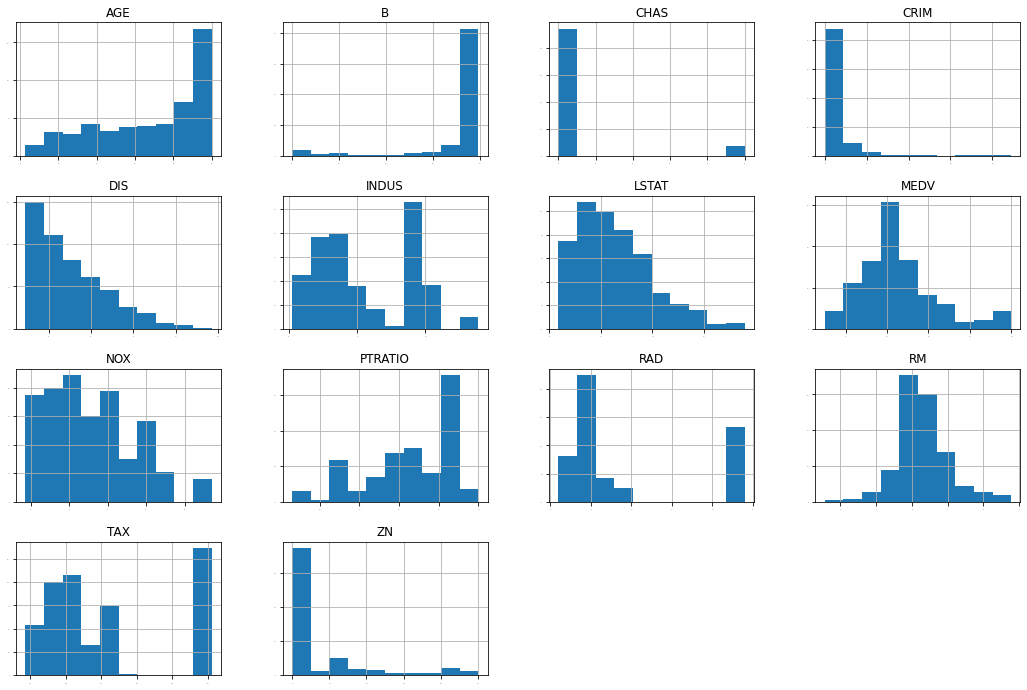

In [4]:
# 2.b) Data visualizations
# histogram of individual attributes
dataset.hist(sharex = False, sharey = False,xlabelsize=1,ylabelsize=1,figsize=(18,12))
plt.show()

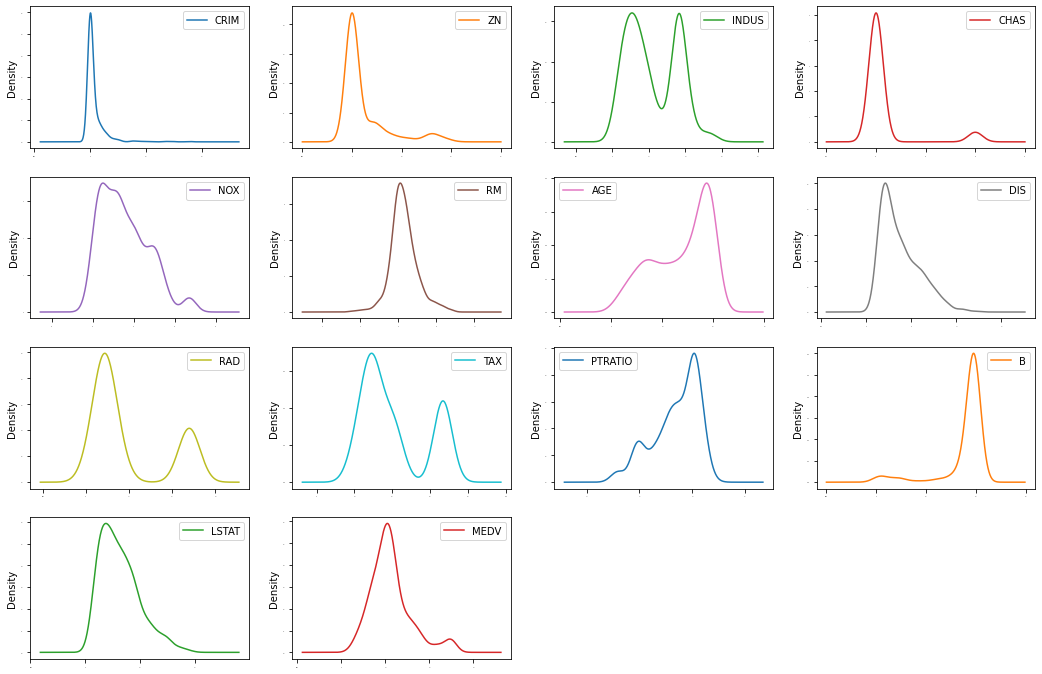

In [5]:
# density
dataset.plot(kind='density', subplots=True,  layout=(4,4),figsize=(18,12), sharex=False, legend=True,fontsize=1)
plt.show()

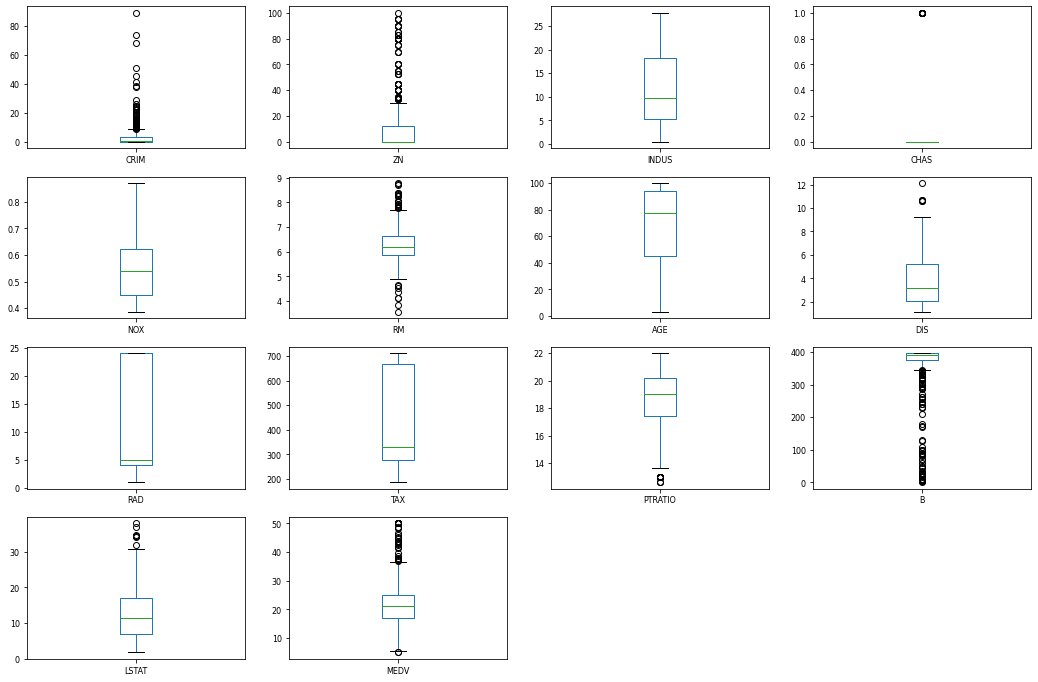

In [6]:
# box and whisker plots
dataset.plot(kind= 'box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8,figsize=(18,12))
plt.show()

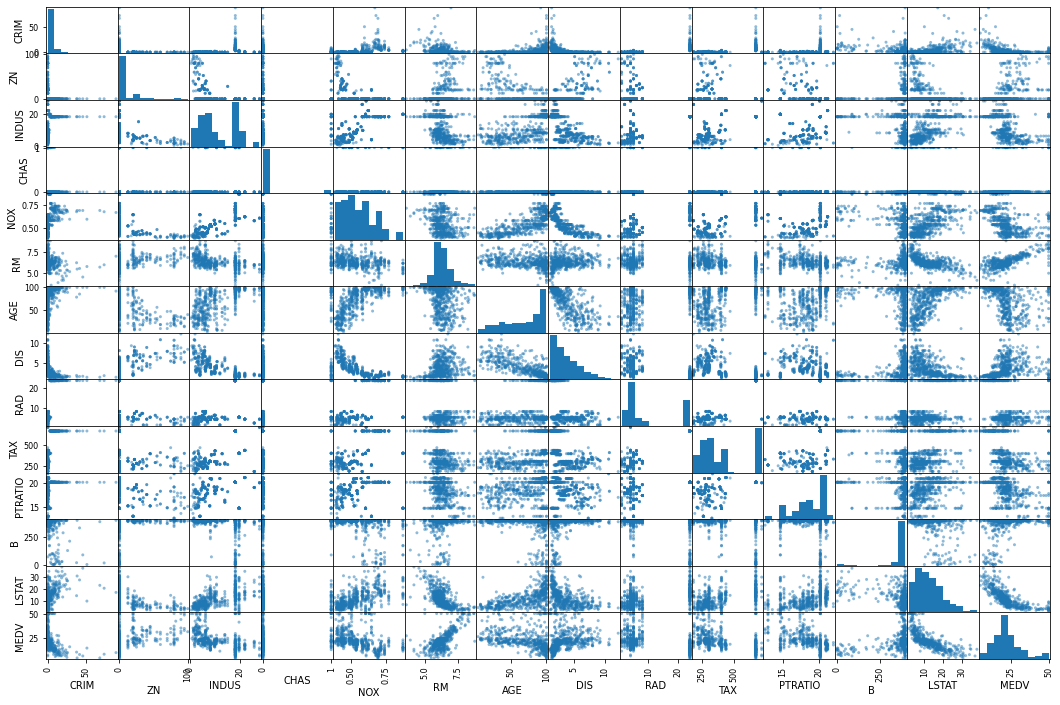

In [7]:
# visualizations of the interactions between variables : scatter matrix
scatter_matrix(dataset,figsize=(18,12))
plt.show()

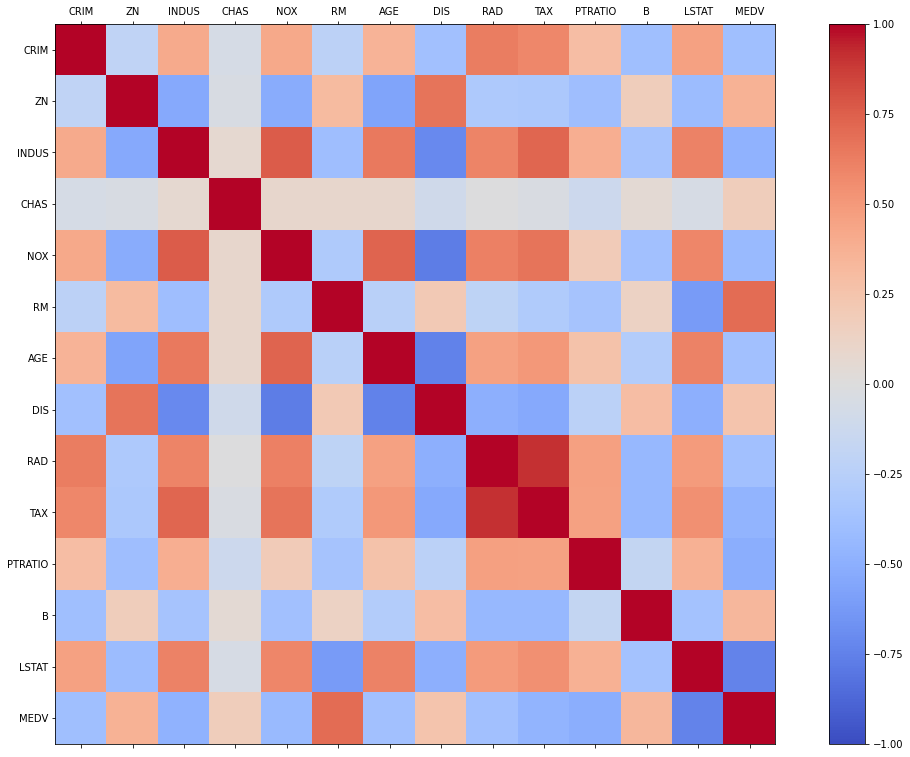

In [8]:
# correlation matrix
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation= 'none',cmap ='coolwarm')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -29.075923 (22.250502)
ScaledSVR: -29.570433 (18.052964)


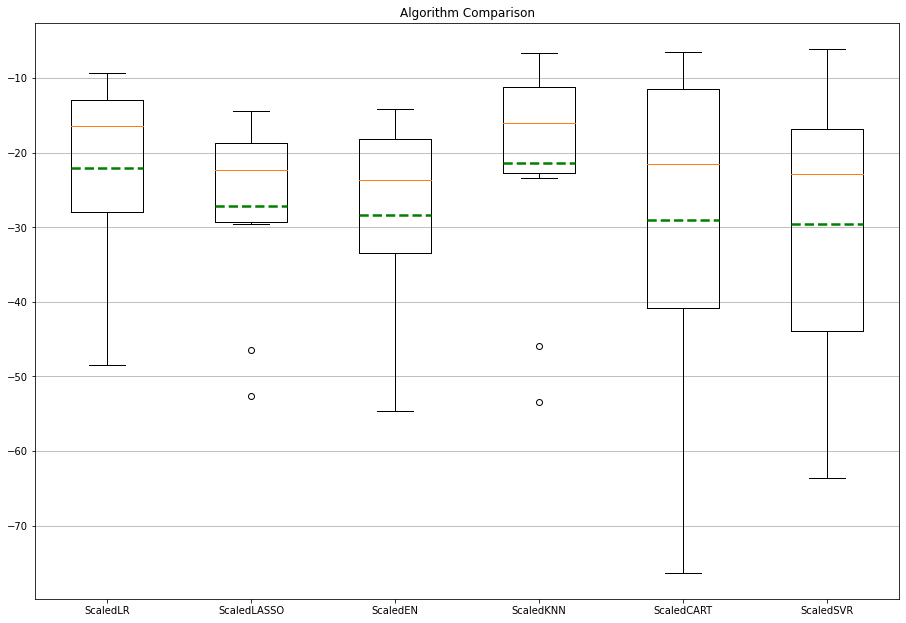

In [9]:
# 3. Evaluate Algorithms
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=test_size, random_state=seed)
# Standarize the data & spot-Check Algorithms
# using pipelines to avoid data leakage when we transform the data
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'
# evaluate each model in turn
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,2,2])
ax2.boxplot(results, labels=names, showmeans=True, meanline=True, meanprops = dict(linestyle='--', linewidth=2.5, color='green'))
ax2.yaxis.grid(True)
ax2.set_title('Algorithm Comparison')
plt.show()

We can see that KNN has both a tight distribution of error and has the lowest score, can it perform better more by parameter tunning? 


In [10]:
# 4. Improve Accuracy
# a) Algorithm Tuning : iterate on the nbr of neighbors 
# KNN Algorithm tuning
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(KNN__n_neighbors = k_values) # tunning parameter : n_neighbors
model = Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))   

Best: -19.493073 using {'KNN__n_neighbors': 1}
-19.493073 (15.772090) with: {'KNN__n_neighbors': 1}
-19.773908 (13.239219) with: {'KNN__n_neighbors': 3}
-21.456867 (15.016218) with: {'KNN__n_neighbors': 5}
-21.220889 (14.192861) with: {'KNN__n_neighbors': 7}
-21.194234 (14.760773) with: {'KNN__n_neighbors': 9}
-21.494941 (14.750981) with: {'KNN__n_neighbors': 11}
-21.509075 (14.759715) with: {'KNN__n_neighbors': 13}
-22.082997 (14.253718) with: {'KNN__n_neighbors': 15}
-22.769667 (14.594785) with: {'KNN__n_neighbors': 17}
-23.674273 (14.893491) with: {'KNN__n_neighbors': 19}
-24.330468 (15.013861) with: {'KNN__n_neighbors': 21}


The best for k (n_neighbors) is 1 providing a mean squared error of -19.493.

ScaledAB: -15.895161 (8.789914)
ScaledGBM: -10.934270 (8.497646)
ScaledRF: -13.162046 (10.410603)
ScaledET: -9.092100 (6.432745)


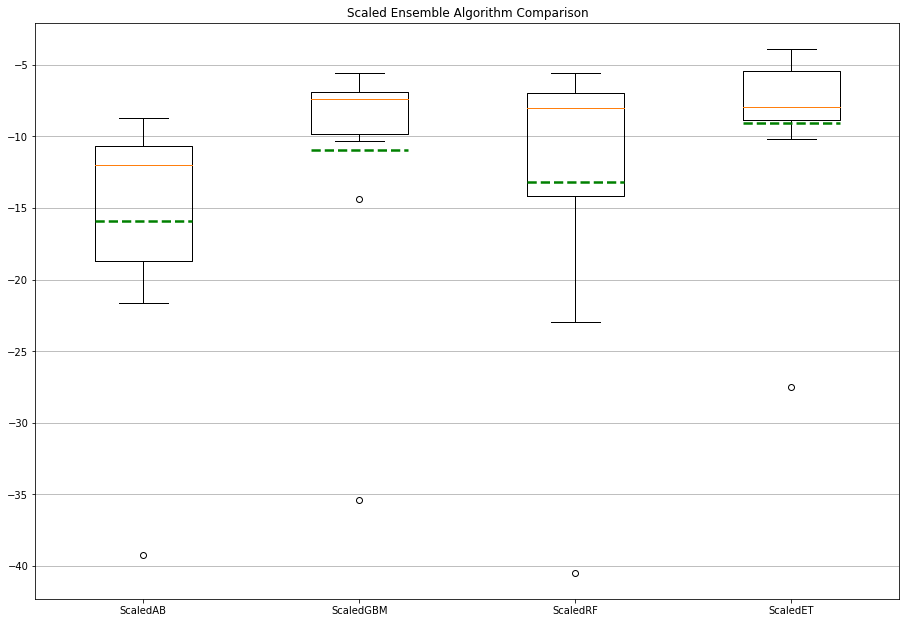

In [11]:
# b) Ensembles
seed2 = 8
ensembles = []
ensembles.append(('ScaledAB',Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor(random_state=seed2))])))
ensembles.append(('ScaledGBM',Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor(random_state=seed2))])))
ensembles.append(('ScaledRF',Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor(random_state=seed2))])))
ensembles.append(('ScaledET',Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor(random_state=seed2))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Ensemble Algorithms
fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,2,2])
ax3.boxplot(results, labels=names, showmeans=True, meanline=True, meanprops = dict(linestyle='--', linewidth=2.5, color='green'))
ax3.yaxis.grid(True)
ax3.set_title('Scaled Ensemble Algorithm Comparison')
plt.show()

It looks like ExtraTrees has a better mean score, it also looks like GradientBoostingRegressor has a similar distribution and perhaps a better median score.
Tuning the ExtraTrees to further lift the performance.

In [12]:
# ET Algorithm tuning
param_grid = dict(ET__n_estimators = np.array([50,60,80,100,150,200,250,300])) # tunning parameter : n_estimators
model = Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(random_state=seed2))])
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -8.995152 using {'ET__n_estimators': 250}
-9.029182 (5.988128) with: {'ET__n_estimators': 50}
-9.030424 (6.065509) with: {'ET__n_estimators': 60}
-9.002385 (6.196072) with: {'ET__n_estimators': 80}
-9.092100 (6.432745) with: {'ET__n_estimators': 100}
-9.055084 (6.301443) with: {'ET__n_estimators': 150}
-9.099157 (6.408998) with: {'ET__n_estimators': 200}
-8.995152 (6.362339) with: {'ET__n_estimators': 250}
-9.023977 (6.424973) with: {'ET__n_estimators': 300}


We can see that the best conﬁguration was n estimators=250 resulting in a mean squared error of -8.995152.

In [13]:
from sklearn.metrics import r2_score
# 5. Finalize Model
# a) Predictions on validation dataset
# prepare the model : training the model on the entire training dataset
sc = StandardScaler()
rescaledX = sc.fit_transform(X_train)
model = ExtraTreesRegressor(random_state=seed2, n_estimators=250)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledTestX = sc.transform(X_test)
predictions = model.predict(rescaledTestX)
print('- mean squared error: {}, r-squared: {}' .format(-mean_squared_error(Y_test, predictions), r2_score(Y_test, predictions)))

- mean squared error: -13.375622906666669, r-squared: 0.8344729369804627
